## B. Computational Problems

### Problem B.1

#### Run a simulation to confirm your result in problem A.3 part (c). That is, simulate some data with a known slope and intercept parameters, then fit an SLR model to the data, and plot the response vs the fitted values.


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28072 -0.62498  0.08171  0.62058  2.78989 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.08865    0.13580   37.47   <2e-16 ***
x            8.00792    0.01175  681.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9662 on 199 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 4.648e+05 on 1 and 199 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ y_hat, data = y_val)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28072 -0.62498  0.08171  0.62058  2.78989 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.891e-14  1.423e-01     0.0        1    
y_hat       1.000e+00  1.467e-03   681.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9662 on 199 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9996 
F-statistic: 4.648e+05 on 1 and 199 DF,  p-value: < 2.2e-16


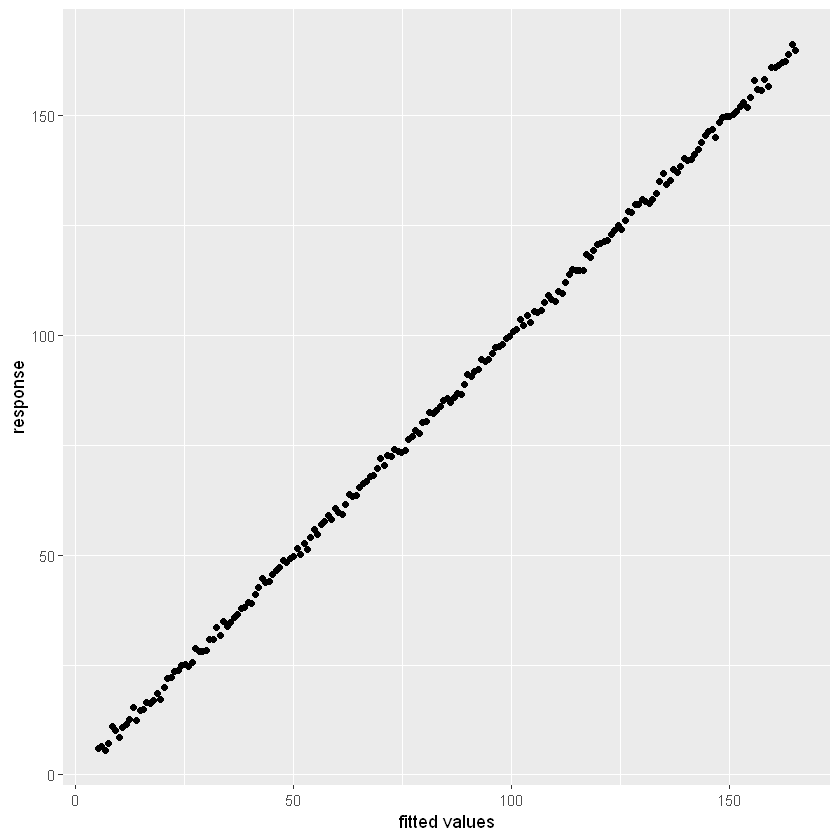

In [1]:
library(ggplot2)

b0<-5
b1<-8

x<-seq(0,20,0.1)
y<-b0+b1*x+rnorm(length(x),mean=0,sd=1)

data<-cbind(x,y)
data<-as.data.frame(data)
lmod<-lm(y~x,data=data)
summary(lmod)

y_hat<-as.numeric(lmod$coefficients[1])+x*as.numeric(lmod$coefficients[2])
y_val<-as.data.frame(cbind(y,y_hat))

ggplot(data = y_val) + geom_point(mapping = aes(x = y_hat, y =y ))+ 
xlab("fitted values")+ylab("response")

summary(lm(y~y_hat,data=y_val))


### Problem B.2

This [link](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Load the dataset using the link above, and explore it graphically and numerically. Are there relationships between variables?

       X                TV             radio          newspaper     
 Min.   :  1.00   Min.   :  0.70   Min.   : 0.000   Min.   :  0.30  
 1st Qu.: 50.75   1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75  
 Median :100.50   Median :149.75   Median :22.900   Median : 25.75  
 Mean   :100.50   Mean   :147.04   Mean   :23.264   Mean   : 30.55  
 3rd Qu.:150.25   3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10  
 Max.   :200.00   Max.   :296.40   Max.   :49.600   Max.   :114.00  
     sales      
 Min.   : 1.60  
 1st Qu.:10.38  
 Median :12.90  
 Mean   :14.02  
 3rd Qu.:17.40  
 Max.   :27.00  

[1] 0.7822244

[1] 0.5762226

[1] 0.228299

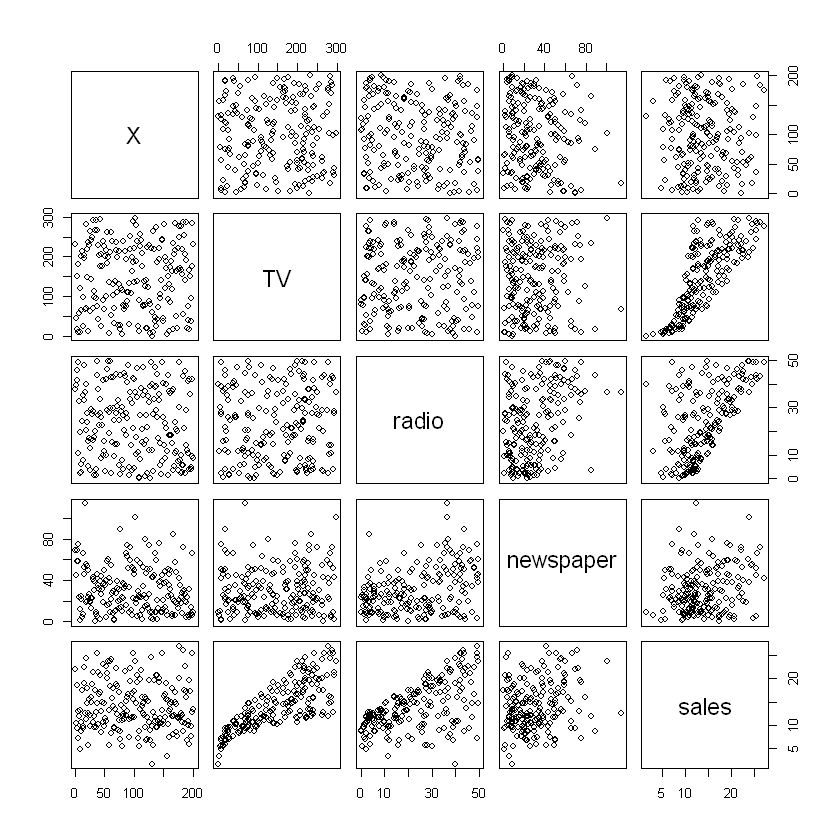

In [2]:
advert <- read.csv("D:\\MSBA\\Spring 2019\\STAT5010\\Advertising.csv", stringsAsFactors=FALSE)
summary(advert)

with(advert, cor(TV, sales))
with(advert, cor(radio, sales))
with(advert, cor(newspaper, sales))

plot(advert)

#### Sales is our response variable. TV, Radio & Newspaper are our predictor variables. Both graphically and numerically we can see that there is a weak correlation between sales & newspaper with a correlation value of 0.228. There is a strong correlation between sales & TV with a correlation of 0.782. However, there is a moderately positive correlation of about 0.57 between sales and radio.

#### (b) Randomly split the dataset into two parts: a training set (80% of the data) and a testing set (20% of the data). 

In [3]:
set.seed(1)

## Training set 20% of data

sample <- sample(1:nrow(advert), size = 0.20*nrow(advert), replace = F)

test <- advert[sample, ]

## Testing set 80% of data

train  <- advert[-sample, ]

nrow(train)
nrow(test)

[1] 160

[1] 40

#### (c) Conduct simple linear regression, using the lm() function and your training set, with sales as the response, and radio as the predictor. Print a summary and interpret the estimated coefficients. Write out the estimated regression equation.

In [4]:
lmod = lm(sales ~ radio, data = train)
summary(lmod)


Call:
lm(formula = sales ~ radio, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6546  -2.0371   0.6635   2.6837   7.9667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.49079    0.58904  16.112  < 2e-16 ***
radio        0.19149    0.02166   8.841 1.76e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.044 on 158 degrees of freedom
Multiple R-squared:  0.331,	Adjusted R-squared:  0.3267 
F-statistic: 78.17 on 1 and 158 DF,  p-value: 1.764e-15


#### The intercept (betahat_0) is 9.49079 and the betahat_1 is 0.19149. When Betahat_1 is zero, in other words when radio budget is 0, the sales will be 9.49079 units. However, for one unit of increase in radio budget, we can approximately estimate that sales will increase by 0.19149 units. 

$\hat Y = 9.49079 + (0.19149*radio$)

#### (c) Plot the data and overlay the least squares regression line. Report and interpret the coefficient of determination.


Call:
lm(formula = train$sales ~ train$radio)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6546  -2.0371   0.6635   2.6837   7.9667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.49079    0.58904  16.112  < 2e-16 ***
train$radio  0.19149    0.02166   8.841 1.76e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.044 on 158 degrees of freedom
Multiple R-squared:  0.331,	Adjusted R-squared:  0.3267 
F-statistic: 78.17 on 1 and 158 DF,  p-value: 1.764e-15


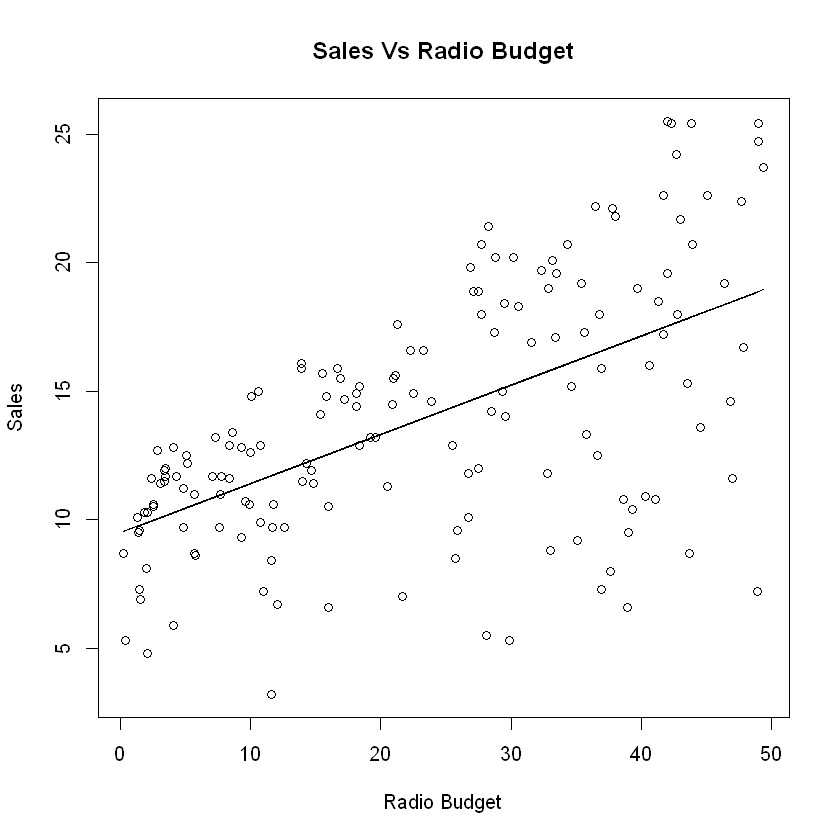

In [5]:
plot(train$radio,train$sales,xlab="Radio Budget", ylab="Sales", main="Sales Vs Radio Budget")

model1 <- lm(train$sales~train$radio)
yfit <- model1$fitted.values
lines(train$radio, yfit)

summary(model1)


#### The coefficient of determiation is 0.3310. This tells us that the 33.10% of the variation in sales (y) is explained by the linear combination of the predcator variable(radio predicator).

#### (d) Plot the residuals (y) against the fitted values (x). Does the variability in the residuals look constant as the fitted values increase? Interpret why that might be important. Also, produce a normal QQ-plot of the residuals. If the points of the QQ-plot roughly follow the line $y = x$, then we don't have evidence against normality of the residuals. How does the QQ-plot look for these residuals?

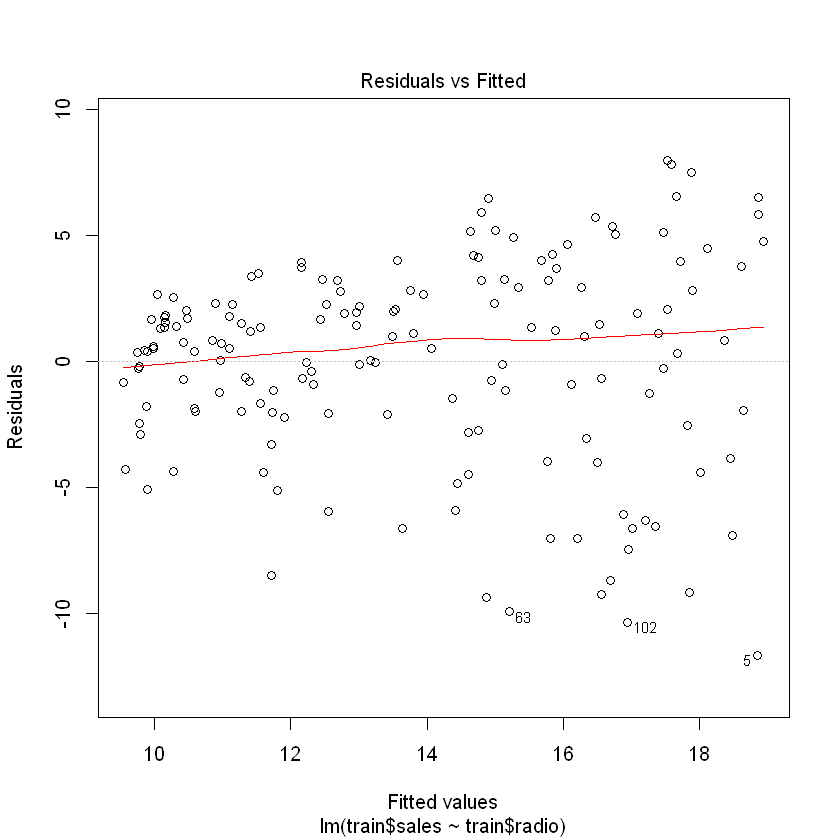

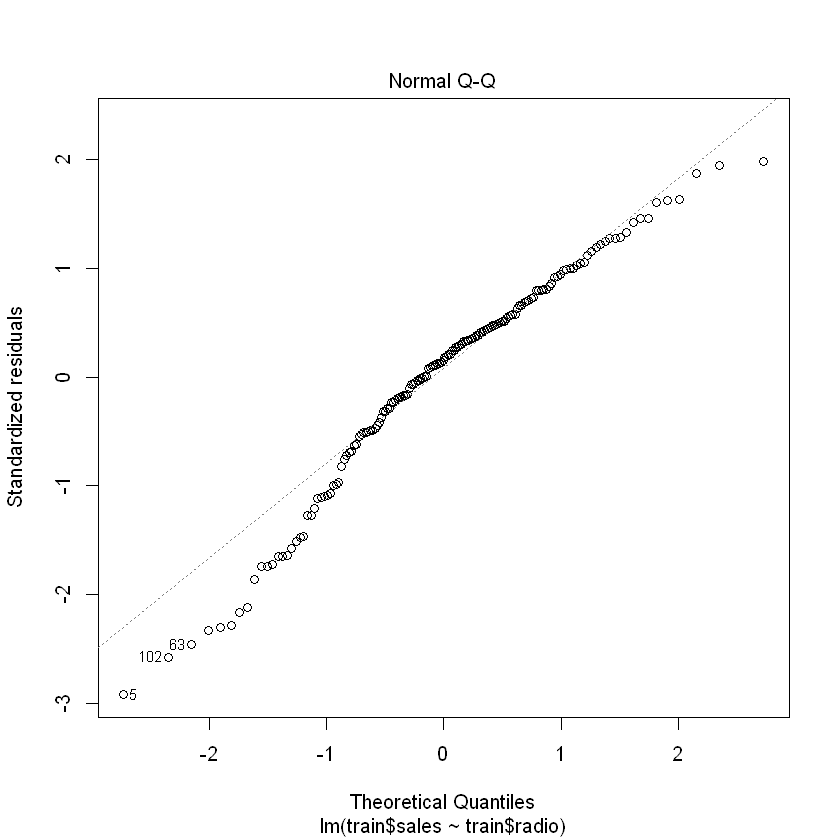

In [6]:
resid <- train$sales - yfit

#Residuals Plot

plot(model1,1)

#QQ-Plot

plot(model1,2)

#### ----No, the variablity does not look constant, as  the fitted values of x (radio) increase, the variablity in Y (sales) tend to increase. This is important because we need the assumption that var(ei)=sigma^2 to use the gauss-markov theorum

#### ----Based on the QQplot, it looks like the residuals approximately follow y=x. It is not a perfect one but it is an approximate. Based on this we do not have evidence against the residual normality.

#### (e) We learned that, often, the goal of regression is to make predictions on new data. Let's see how well the model does at predicting values that we left out of the training set.

#### We can get a sense of how well the model does at predicting by computing the prediction mean squared error (MSE):

$$ MSE = \frac{1}{n}\sum^n_{i=1}\bigg(y_i - \widehat{y}_i \bigg)^2.$$

####  Compute the MSE for the data in the training set, and for data in the testing set. Which one is lower? Explain why you think it's lower.

In [7]:
##Compute the MSE for the training data

nrow(train)

resid_train <- train$sales - yfit
resid_square <- sum((train$sales - yfit)^2)

mse_train <- (resid_square)/nrow(train)

mse_train

##Compute the MSE for the testing data

nrow(test)

model2 <- lm(test$sales~test$radio)
yfit_hat <- model2$fitted.values

resid_test <- test$sales - yfit_hat
resid_square_test <- sum((test$sales - yfit_hat)^2)

mse_test <- resid_square_test/nrow(test)

mse_test

[1] 160

[1] 16.14565

[1] 40

[1] 25.30553

#### MSE for training data set is lower when compared to the MSE for the testing data set. This is because training data set contains 160 rows compared to testing data set which contains only 40 rows. i suppose we can say that since there is lesser data in the test data, the MSE tend to be higher, whereas the training dataset has 160 rows which can result in a lower MSE.

### Problem B.3

Now let's perform multiple linear regression using the dataset from Problem B.2


#### (a) Perform MLR, using your training set, using sales as the response and all other variables as predictors.

In [8]:
set.seed(1)

lmod.1 = lm(sales ~ radio + TV + newspaper, data = train)
summary(lmod.1)


Call:
lm(formula = sales ~ radio + TV + newspaper, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3041 -0.8797  0.2558  1.0099  2.7670 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.131343   0.331966   9.433   <2e-16 ***
radio        0.191291   0.008819  21.692   <2e-16 ***
TV           0.044669   0.001472  30.346   <2e-16 ***
newspaper   -0.004933   0.006086  -0.810    0.419    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.546 on 156 degrees of freedom
Multiple R-squared:  0.9034,	Adjusted R-squared:  0.9016 
F-statistic: 486.4 on 3 and 156 DF,  p-value: < 2.2e-16


#### (b) Interpret the estimated coefficient associated with TV. Interpret the coefficient of determination.

#### ----The coefficient associated with TV is 0.044669. This tells us that, if we hold all other variables (predictors) constant (all predicators are zero), then 1 unit change in the TV budget will change the sales (Y-response variable) by an amount of 0.044669 units.

#### ----The coefficient of determination is 0.9034. This tells us the 90.34% of the variation in the sales (Y-response) can be explained by the linear relationship between the predictors (X-variables).

#### (c) Plot the residuals (y) against the fitted values (x). Do you notice any curvature in the residual plot? Also, produce a normal QQ-plot of the residuals. Do you have any worries about the normality of the residuals?

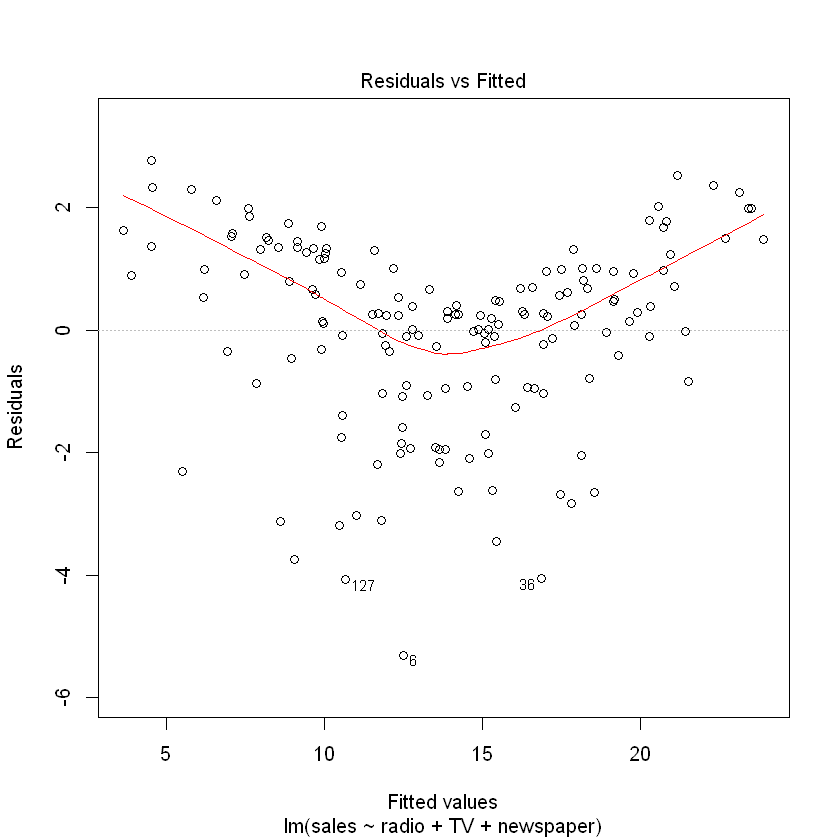

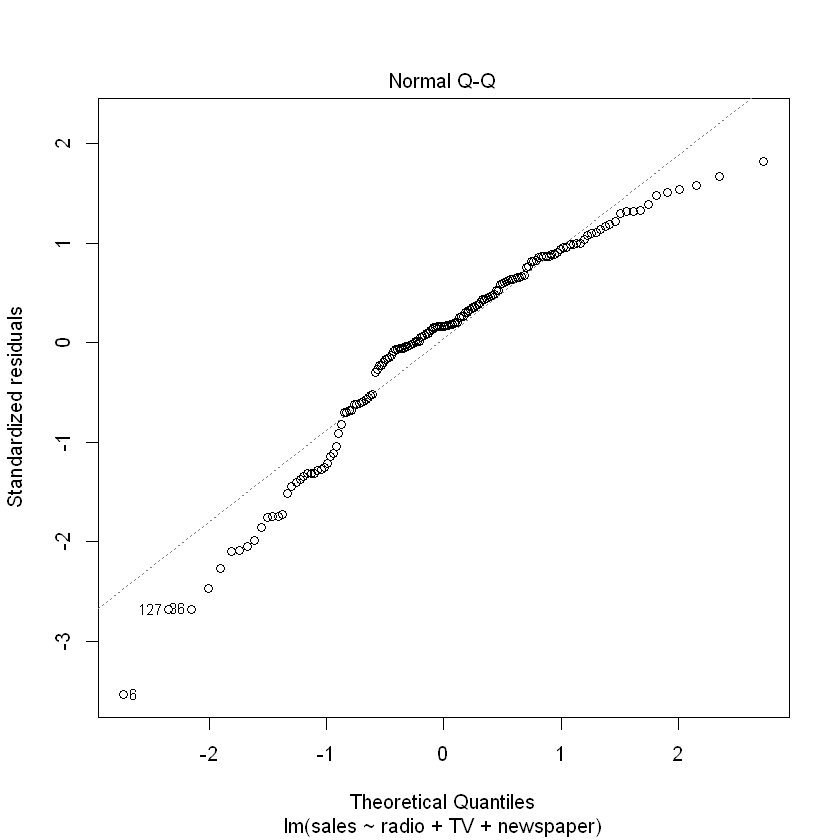

In [9]:
set.seed(1)

## Training set 20% of data

sample.1 <- sample(1:nrow(advert), size = 0.20*nrow(advert), replace = F)

test.1 <- advert[sample.1, ]

## Testing set 80% of data

train.1  <- advert[-sample.1, ]

model3 <- lm(train$sales~train$radio + train$TV + train$newspaper)
yfit.1 <- model3$fitted.values

#Residuals vs Fitted plot

plot(lmod.1,1)

#QQplot of the Residuals

plot(lmod.1,2)

#### ----Yes, I notice a curvature in the residual plot. This shows that there is no constant variability in the residuals. The variability tends to first decrease then stay flat before increasing. 

#### ----As shown above, the QQplot tends not follow the y=x line. Most of the points are not on the line but either above or below the line. This tells us that we should worry about the normality of the residuals.

#### (c) Compute the MSE for the data in the training set, and for data in the testing set. Which one is lower? Explain why you think it's lower.

In [10]:
##Compute the MSE for the training data

nrow(train.1)

resid_train <- train$sales - yfit.1
resid_square <- sum((train$sales - yfit.1)^2)

mse_train <- (resid_square)/nrow(train)

mse_train

##Compute the MSE for the testing data

nrow(test.1)

model4 <- lm(test$sales~test$radio + test$TV + test$newspaper)
yfit_hat.1 <- model4$fitted.values

resid_test <- test$sales - yfit_hat.1

resid_square_test <- sum((test$sales - yfit_hat.1)^2)

mse_test <- resid_square_test/nrow(test)

mse_test

[1] 160

[1] 2.331025

[1] 40

[1] 4.387623

#### Note, based on the above calculations, the MSE for the training data set has a lower MSE.

#### The test data set here is only 40 rows of data and hence could have more noise in the data and result in a higher MSE. However, the training data set have 160 rows of data, with more data, there could be lesser noise and hence lower MSE. Also note, a lower training error is expected when a method easily overfits to the training data, yet, poorly generalizes. A lower test error (lower MSE) can happen only if a particular method generalizes well.